ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

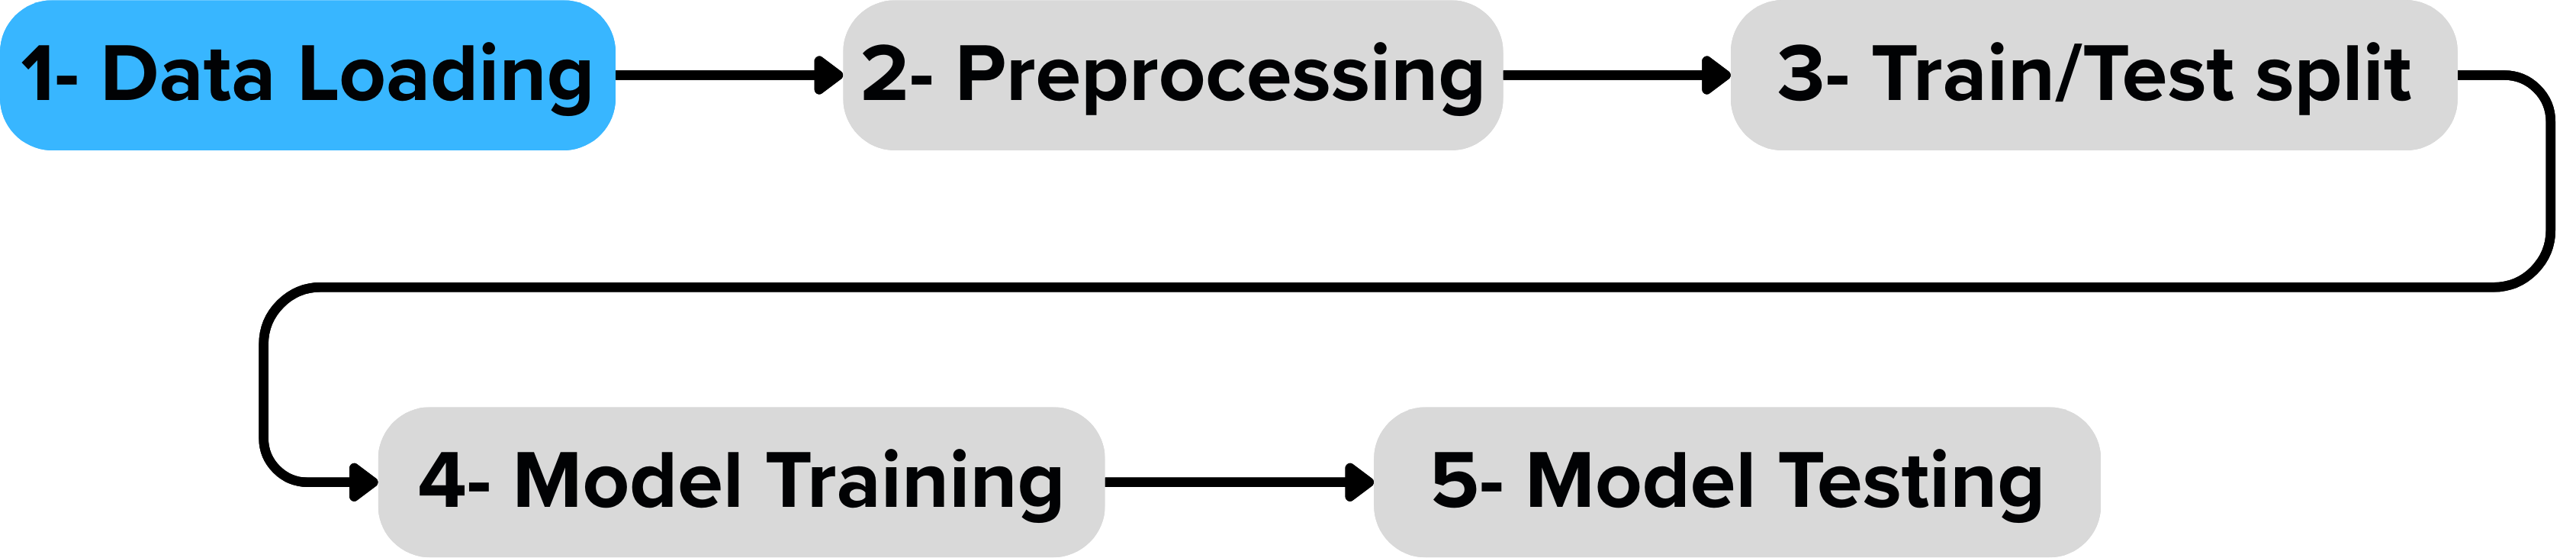

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chetanmittal033/credit-card-fraud-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-card-fraud-data' dataset.
Path to dataset files: /kaggle/input/credit-card-fraud-data


In [3]:
import os


print(os.listdir(path))

['fraudTest.csv']


In [4]:
path = os.path.join(path,'fraudTest.csv')

In [5]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [6]:
# Load Dataset

df = pd.read_csv(path)
# Display first 5 rows
df.head()

,sn,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Check Missing Values

In [7]:
# Check all values
print(df.isna())

           sn  trans_date_trans_time  cc_num  merchant  category    amt  \
0       False                  False   False     False     False  False   
1       False                  False   False     False     False  False   
2       False                  False   False     False     False  False   
3       False                  False   False     False     False  False   
4       False                  False   False     False     False  False   
...       ...                    ...     ...       ...       ...    ...   
555714  False                  False   False     False     False  False   
555715  False                  False   False     False     False  False   
555716  False                  False   False     False     False  False   
555717  False                  False   False     False     False  False   
555718  False                  False   False     False     False  False   

        first   last  gender  street  ...    lat   long  city_pop    job  \
0       False  False   

In [8]:
print(df.isna().sum())

sn                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


### Check duplicate rows

In [9]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

,0


### No. of rows and columns

In [10]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (555719, 23) 

number of rows:  555719
number of columns:  23


### Data type of columns

In [11]:
# viewing the data types of columns
df.dtypes

,0
sn,int64
trans_date_trans_time,object
cc_num,float64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [18]:
df['Date'] = pd.to_datetime(df['trans_date_trans_time'])


df.dtypes

/tmp/ipython-input-1644956791.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['trans_date_trans_time'])


,0
sn,int64
trans_date_trans_time,object
cc_num,float64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


### Descriptive summary Statistics

In [13]:
# Statistical summary
df.describe(include='all')

,sn,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,226976,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,15-12-2020 21:26,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,23-03-1977,1765bb45b3aa3224b4cdcb6e7a96cee3,NaN,NaN,NaN,NaN
freq,NaN,16,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800430e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521420e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635330e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


### Univariate Analysis

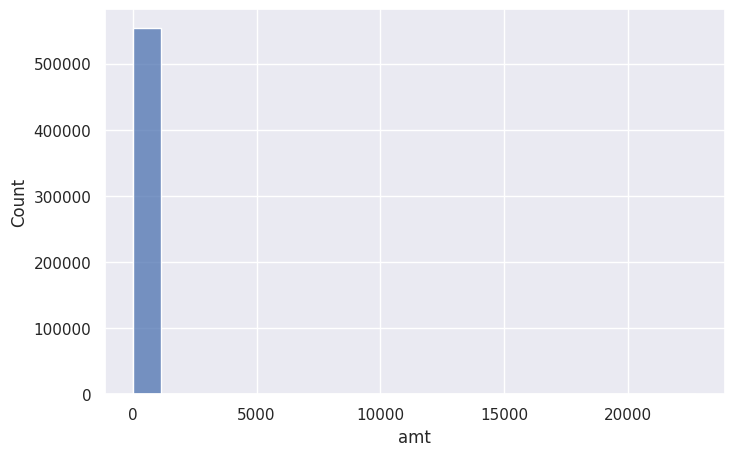

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['amt'], bins=20)
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

### Distribution of Revenue

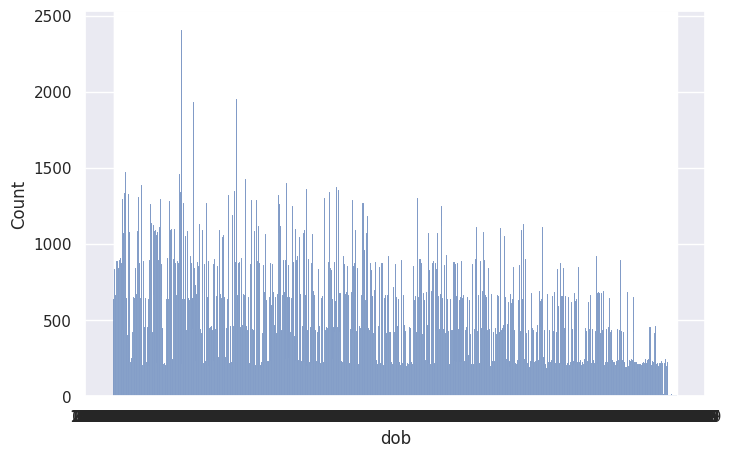

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['dob'], bins=20)
plt.show()

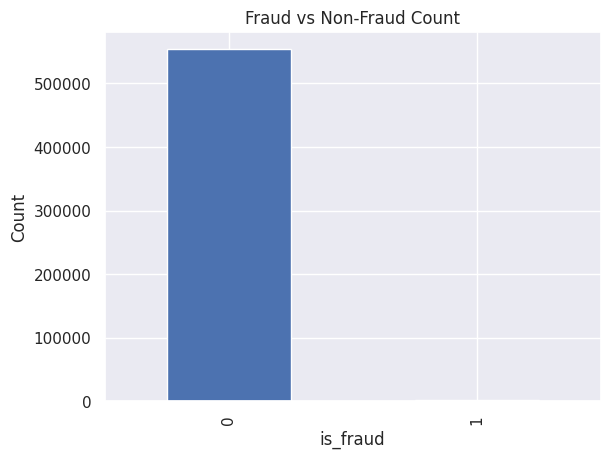

is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64


In [20]:
plt.figure()
df["is_fraud"].value_counts().plot(kind="bar")
plt.title("Fraud vs Non-Fraud Count")
plt.xlabel("is_fraud")
plt.ylabel("Count")
plt.show()

print(df["is_fraud"].value_counts(normalize=True))


### Revenue by Product

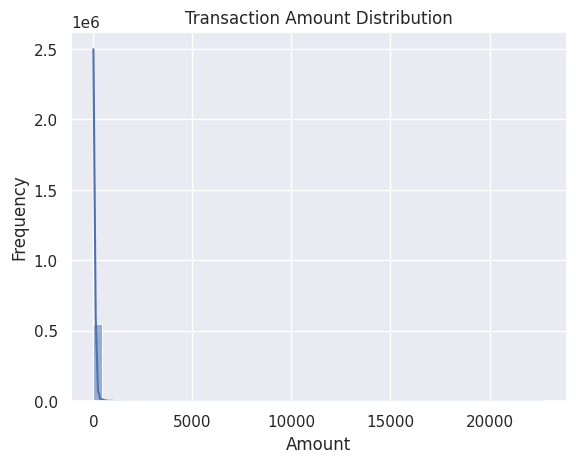

In [21]:
plt.figure()
sns.histplot(df["amt"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


### Revenue by Sales Person

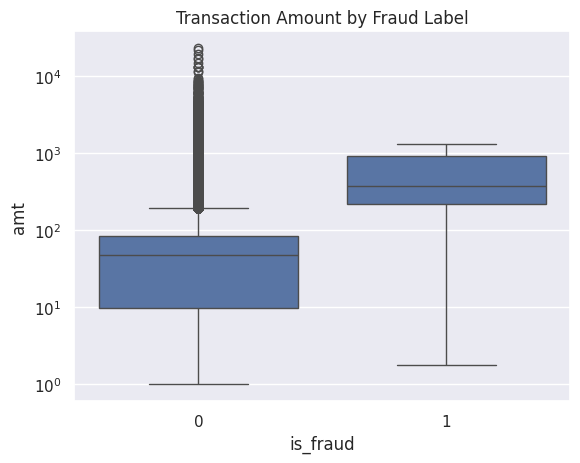

In [22]:
plt.figure()
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.yscale("log")  # amounts usually span wide range
plt.title("Transaction Amount by Fraud Label")
plt.show()


### Boxes vs Revenue Relationship

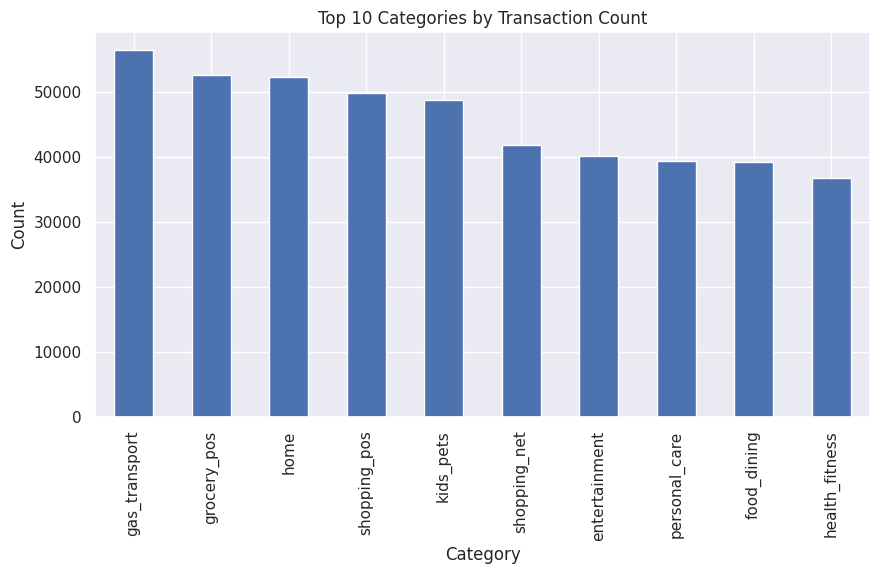

In [25]:
plt.figure(figsize=(10,5))
df["category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Categories by Transaction Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


### Correlation Matrix

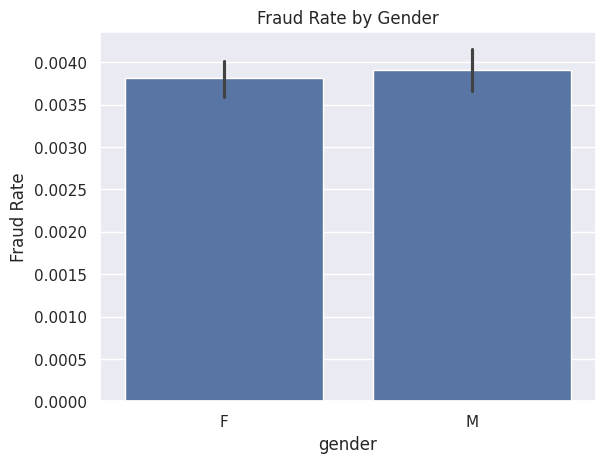

In [26]:
plt.figure()
sns.barplot(x="gender", y="is_fraud", data=df)
plt.title("Fraud Rate by Gender")
plt.ylabel("Fraud Rate")
plt.show()


- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Revenue Trend

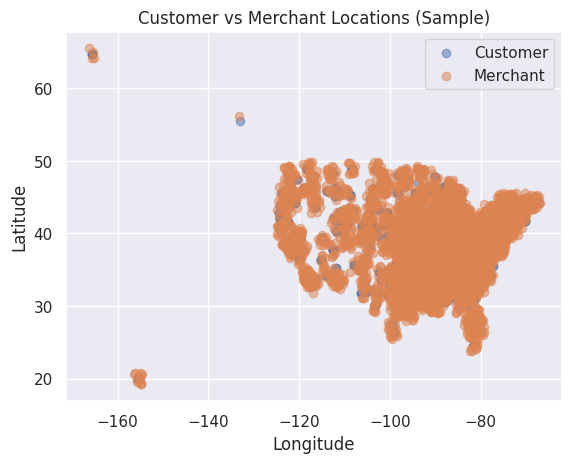

In [28]:
# Sample if dataset is huge
sample_df = df.sample(5000, random_state=42)

plt.figure()
plt.scatter(sample_df["long"], sample_df["lat"], alpha=0.5, label="Customer")
plt.scatter(sample_df["merch_long"], sample_df["merch_lat"], alpha=0.5, label="Merchant")
plt.legend()
plt.title("Customer vs Merchant Locations (Sample)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.